In [1]:
from google.colab import files
uploaded = files.upload()


Saving archive.zip to archive.zip


In [2]:
import zipfile
import os

# Unzip the file
with zipfile.ZipFile("archive.zip", 'r') as zip_ref:
    zip_ref.extractall("fundsight_data")

# Check extracted files
os.listdir("fundsight_data")


['StartUp_FundingScrappingData']

In [4]:
import pandas as pd


In [5]:
import zipfile
import os

with zipfile.ZipFile("/content/archive.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/fundsight_data")

# Check what files were extracted
os.listdir("/content/fundsight_data")


['StartUp_FundingScrappingData']

In [9]:
import os
os.listdir("/content/fundsight_data/StartUp_FundingScrappingData/2021")


['Dec_2021.csv',
 'Sep_2021.csv',
 'Aug_2021.csv',
 'Mar_2021.csv',
 'Apr_2021.csv',
 'Jun_2021.csv',
 'May_2021.csv',
 'Feb_2021.csv',
 'Jan_2021.csv',
 'Oct_2021.csv',
 'Nov_2021.csv',
 'Jul_2021.csv']

In [10]:
import pandas as pd
import os

folder_path = "/content/fundsight_data/StartUp_FundingScrappingData/2021"

# Read and combine all monthly CSVs
df_list = []
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        df_month = pd.read_csv(os.path.join(folder_path, file))
        df_month["source_file"] = file  # optional: track which month it came from
        df_list.append(df_month)

df = pd.concat(df_list, ignore_index=True)
df.shape, df.head()


((1209, 11),
    Unnamed: 0  Startup Name  Founding Date       City  \
 0           0  CollegeDekho         2015.0    Gurgaon   
 1           1          BOX8         2012.0     Mumbai   
 2           2         Simpl         2015.0  Bangalore   
 3           3   8i Ventures         2018.0     Mumbai   
 4           4     PayGlocal         2021.0  Bangalore   
 
                   Industry/Vertical  \
 0                        E-learning   
 1                  Food & Beverages   
 2                 Consumer Services   
 3  Venture Capital & Private Equity   
 4                Financial Services   
 
                                         Sub-Vertical  \
 0  Collegedekho.com is Student’s Partner, Friend ...   
 1                   India's Largest Desi Meals Brand   
 2  Simpl empowers merchants to build trusted rela...   
 3  8i is a Mumbai & Bangalore based early stage f...   
 4  PayGlocal is a FinTech solving for global paym...   
 
                                          Founders 

In [11]:
import pandas as pd
import os

base_path = "/content/fundsight_data/StartUp_FundingScrappingData"
all_data = []

# Loop through each year folder (e.g., 2015 to 2021)
for year in os.listdir(base_path):
    year_folder = os.path.join(base_path, year)
    if os.path.isdir(year_folder):
        for file in os.listdir(year_folder):
            if file.endswith(".csv"):
                file_path = os.path.join(year_folder, file)
                df_year = pd.read_csv(file_path)
                df_year["source_file"] = file
                df_year["year"] = year  # add year column
                all_data.append(df_year)

# Combine all years
df_all = pd.concat(all_data, ignore_index=True)
df_all.columns = df_all.columns.str.strip().str.lower().str.replace(' ', '_')
df_all.shape, df_all.head()


((5302, 34),
    sr._no. date(dd/mm/yyyy)    startup_name industry/_vertical  \
 0      1.0        01/9/2016  Mad Street Den         Technology   
 1      2.0        01/9/2016           Mihup         Technology   
 2      3.0        01/9/2016        Renowala          eCommerce   
 3      4.0        01/9/2016        Lucideus         Technology   
 4      5.0        04/9/2016       Trackbizz         Technology   
 
                                         sub-vertical city_/_location  \
 0                   Artificial Intelligence platform         Chennai   
 1                         Personal Digital Assistant         Kolkata   
 2                       Home Improvement Marketplace       Hyderabad   
 3  IT Risk Assessment and Digital Security Servic...       New Delhi   
 4                      Field Force Automation System           Kochi   
 
                                      investors’_name invest-menttype  \
 0  Sequoia India, Exfinity Ventures, growX ventures,  Private Equity 

In [12]:
df_all.columns = df_all.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'\(.*\)', '', regex=True)
df_all.columns


Index(['sr._no.', 'date', 'startup_name', 'industry/_vertical', 'sub-vertical',
       'city_/_location', 'investors’_name', 'invest-menttype', 'amount_',
       'source_file', 'year', 'industry_vertical', 'investmenttype', 'remarks',
       'unnamed:_0', 'founding_date', 'city', 'industry/vertical', 'founders',
       'investors', 'amount', 'investment_stage', '0', '1', '2', '3', '4', '5',
       '6', '7', '8', 'date', 'investor_name', 'investment_type'],
      dtype='object')

In [13]:
df_all = df_all.loc[:, ~df_all.columns.str.match(r'^\d+$')]


In [15]:
df_all.columns.tolist()


['sr._no.',
 'date',
 'startup_name',
 'industry/_vertical',
 'sub-vertical',
 'city_/_location',
 'investors’_name',
 'invest-menttype',
 'amount_',
 'source_file',
 'year',
 'industry_vertical',
 'investmenttype',
 'remarks',
 'unnamed:_0',
 'founding_date',
 'city',
 'industry/vertical',
 'founders',
 'investors',
 'amount',
 'investment_stage',
 'date',
 'investor_name',
 'investment_type']

In [16]:
df_all.columns = df_all.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'\(.*\)', '', regex=True)


In [17]:
print(df_all.columns.tolist())


['sr._no.', 'date', 'startup_name', 'industry/_vertical', 'sub-vertical', 'city_/_location', 'investors’_name', 'invest-menttype', 'amount_', 'source_file', 'year', 'industry_vertical', 'investmenttype', 'remarks', 'unnamed:_0', 'founding_date', 'city', 'industry/vertical', 'founders', 'investors', 'amount', 'investment_stage', 'date', 'investor_name', 'investment_type']


In [18]:
df_all['amount'] = df_all['amount'].astype(str) \
    .str.replace(',', '') \
    .str.replace('₹', '') \
    .str.replace('$', '') \
    .str.strip()

df_all['amount'] = pd.to_numeric(df_all['amount'], errors='coerce')


In [19]:
print(df_all[['amount_', 'amount']].head(10))


     amount_  amount
0        NaN     NaN
1  6,700,000     NaN
2        NaN     NaN
3        NaN     NaN
4        NaN     NaN
5        NaN     NaN
6        NaN     NaN
7  1,350,000     NaN
8    500,000     NaN
9        NaN     NaN


In [20]:
df_all['amount'] = df_all['amount_'].astype(str) \
    .str.replace(',', '') \
    .str.replace('₹', '') \
    .str.replace('$', '') \
    .str.strip()

df_all['amount'] = pd.to_numeric(df_all['amount'], errors='coerce')


In [21]:
df_all.drop(columns=['amount_'], inplace=True, errors='ignore')


In [22]:
import plotly.express as px

funding_by_year = df_all.groupby('year')['amount'].sum().reset_index()

fig1 = px.bar(funding_by_year, x='year', y='amount',
              title='💸 Total Startup Funding by Year (2015–2021)',
              labels={'amount': 'Funding (USD)'})
fig1.show()


In [23]:
df_all['year'].value_counts(dropna=False).sort_index()


,count
year,
2015,951
2016,1041
2017,700
2018,309
2019,114
2020,978
2021,1209


In [24]:
df_all[df_all['amount'].notna()].groupby('year')['amount'].sum().sort_index()


,amount
year,
2015,8.673022e+09
2016,3.905859e+09
2017,5.844060e+09


In [25]:
df_all.columns.value_counts()


,count
date,2
sr._no.,1
startup_name,1
industry/_vertical,1
sub-vertical,1
city_/_location,1
investors’_name,1
invest-menttype,1
source_file,1
year,1


In [26]:
import pandas as pd
import os

base_path = "/content/fundsight_data/StartUp_FundingScrappingData"
all_data = []

for year in os.listdir(base_path):
    year_folder = os.path.join(base_path, year)
    if os.path.isdir(year_folder):
        for file in os.listdir(year_folder):
            if file.endswith(".csv"):
                file_path = os.path.join(year_folder, file)
                df = pd.read_csv(file_path)

                # Normalize column names
                df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w\s]', '', regex=True)

                # Try to find an 'amount' column (handle different names)
                possible_amount_cols = [col for col in df.columns if 'amount' in col]
                if possible_amount_cols:
                    amt_col = possible_amount_cols[0]
                    df['amount'] = df[amt_col].astype(str) \
                                        .str.replace(',', '') \
                                        .str.replace('₹', '') \
                                        .str.replace('$', '') \
                                        .str.strip()
                    df['amount'] = pd.to_numeric(df['amount'], errors='coerce')
                else:
                    df['amount'] = None  # if no amount found

                # Parse date
                date_cols = [col for col in df.columns if 'date' in col]
                if date_cols:
                    df['date'] = pd.to_datetime(df[date_cols[0]], errors='coerce', dayfirst=True)
                    df['year'] = df['date'].dt.year
                else:
                    df['year'] = year

                df['source_file'] = file
                df['source_year'] = year
                all_data.append(df)

# Combine all years
df_all = pd.concat(all_data, ignore_index=True)
df_all = df_all[df_all['amount'].notna()]  # keep only rows with clean amount
df_all['year'] = df_all['year'].astype('Int64')

df_all[['startup_name', 'amount', 'year']].head()


/tmp/ipython-input-1495673722.py:44: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,startup_name,amount,year
1,Mihup,6700000.0,2016
7,eShakti,1350000.0,2016
8,CheersOye!,500000.0,2016
10,BigStylist,900000.0,2016
11,Zilingo,8000000.0,2016


In [27]:
df_all['year'].value_counts().sort_index()


,count
year,
1970,1606
2011,4
2012,1
2013,3
2014,7
2015,658
2016,610
2017,461
2018,271


In [28]:
df_all.groupby('year')['amount'].sum().sort_index()


,amount
year,
1970,2.679489e+11
2011,1.248110e+08
2012,2.800000e+07
2013,3.587000e+06
2014,2.543190e+07
2015,8.693745e+09
2016,3.922503e+09
2017,1.044501e+10
2018,5.128831e+09


In [29]:
df_all = df_all[df_all['year'] != 1970]


In [31]:
print(df_all.columns.tolist())


['sr_no', 'dateddmmyyyy', 'startup_name', 'industry_vertical', 'subvertical', 'city__location', 'investors_name', 'investmenttype', 'amount_in_usd', 'amount', 'date', 'year', 'source_file', 'source_year', 'remarks', 'unnamed_0', 'founding_date', 'city', 'industryvertical', 'founders', 'investors', 'amountin_usd', 'investment_stage', '0', '1', '2', '3', '4', '5', '6', '7', '8', 'investor_name', 'investment_type', 'final_amount']


In [33]:
import pandas as pd

# Step 1: Create 'final_amount' as a copy of 'amount'
df_all['final_amount'] = df_all['amount']

# Step 2: Set 'final_amount' column to object type to safely hold strings before conversion
df_all['final_amount'] = df_all['final_amount'].astype(object)

# Step 3: Create a mask for rows where 'final_amount' is NaN and 'amount_in_usd' is not NaN
mask = df_all['final_amount'].isna() & df_all['amount_in_usd'].notna()

# Step 4: Clean and fill the missing values from 'amount_in_usd'
df_all.loc[mask, 'final_amount'] = (
    df_all.loc[mask, 'amount_in_usd'].astype(str)
        .str.replace(',', '')
        .str.replace('₹', '')
        .str.replace('$', '')
        .str.strip()
)

# Step 5: Convert 'final_amount' column to numeric (float), coercing invalid strings to NaN
df_all['final_amount'] = pd.to_numeric(df_all['final_amount'], errors='coerce')


In [34]:
df_all['final_amount'].describe()


,final_amount
count,2.128000e+03
mean,1.789385e+07
std,1.195149e+08
min,1.600000e+04
25%,4.587500e+05
50%,1.600000e+06
75%,8.000000e+06
max,3.900000e+09


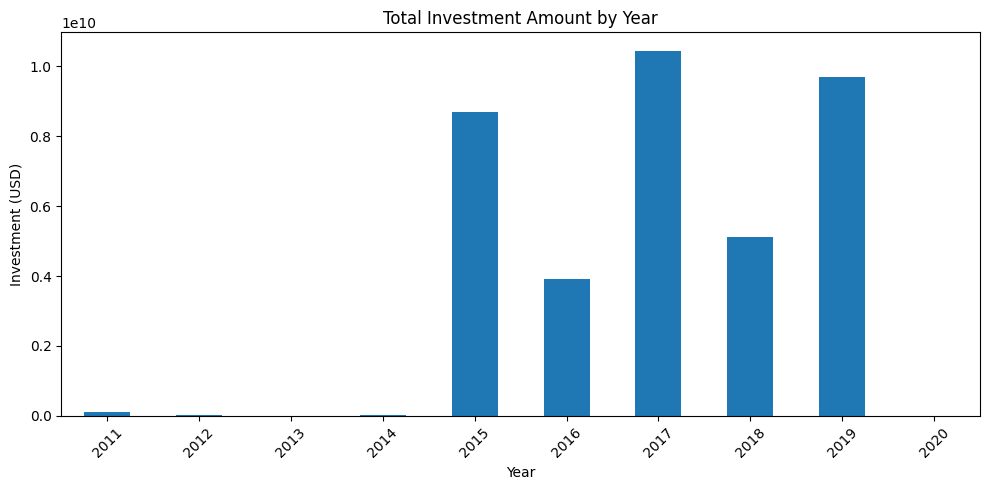

In [35]:
import matplotlib.pyplot as plt

df_all.groupby('year')['final_amount'].sum().sort_index().plot(kind='bar', figsize=(10,5))
plt.title("Total Investment Amount by Year")
plt.ylabel("Investment (USD)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
df_all = df_all[df_all['year'] != 1970]


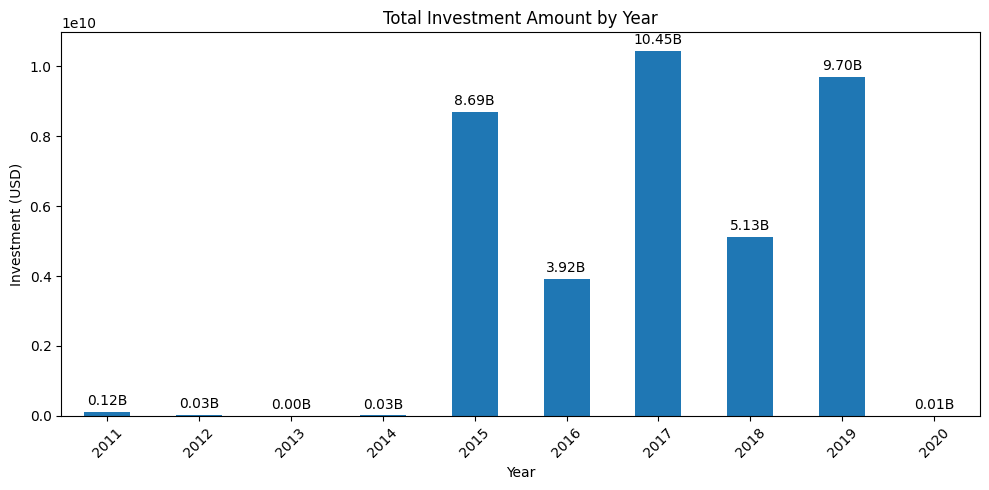

In [37]:
import numpy as np

yearly = df_all.groupby('year')['final_amount'].sum().sort_index()
ax = yearly.plot(kind='bar', figsize=(10,5))

for i, v in enumerate(yearly):
    ax.text(i, v + 1e8, f"{v/1e9:.2f}B", ha='center', va='bottom')

plt.title("Total Investment Amount by Year")
plt.ylabel("Investment (USD)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-1310723196.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




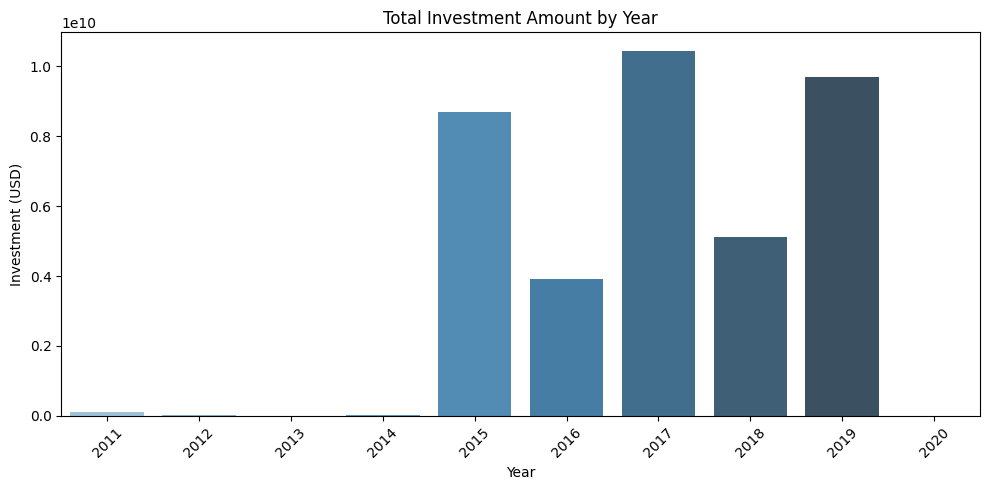

In [38]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x=yearly.index, y=yearly.values, palette='Blues_d')
plt.title("Total Investment Amount by Year")
plt.ylabel("Investment (USD)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:
import pandas as pd
import numpy as np

# Keep only columns we’ll actually use
keep_cols = [
    'startup_name','final_amount','year','date',
    'city','city__location',
    'industry_vertical','industryvertical','industry/_vertical','subvertical','sub-vertical',
    'investors','investors_name','investor_name',
    'investment_type','investmenttype','investment_stage','remarks','source_file','source_year'
]
use_cols = [c for c in keep_cols if c in df_all.columns]
df = df_all[use_cols].copy()

# Canonical text columns
def first_nonnull(series, prefer=None):
    # prefer: list of columns to prioritize when choosing first non-null
    if prefer is None: return series.bfill(axis=1).iloc[:,0]
    return series[prefer].bfill(axis=1).iloc[:,0]

df['sector'] = first_nonnull(
    df[[c for c in ['industry_vertical','industryvertical','industry/_vertical'] if c in df.columns]],
    prefer=[c for c in ['industry_vertical','industry/_vertical','industryvertical'] if c in df.columns]
)

df['city_clean'] = first_nonnull(
    df[[c for c in ['city','city__location'] if c in df.columns]],
    prefer=[c for c in ['city','city__location'] if c in df.columns]
)

df['investors_clean'] = first_nonnull(
    df[[c for c in ['investors','investors_name','investor_name'] if c in df.columns]],
    prefer=[c for c in ['investors','investors_name','investor_name'] if c in df.columns]
)

df['stage'] = first_nonnull(
    df[[c for c in ['investment_stage'] if c in df.columns]]
) if 'investment_stage' in df.columns else np.nan

df['type'] = first_nonnull(
    df[[c for c in ['investment_type','investmenttype'] if c in df.columns]],
    prefer=[c for c in ['investment_type','investmenttype'] if c in df.columns]
)

# Normalize strings
for col in ['startup_name','sector','city_clean','investors_clean','stage','type']:
    if col in df.columns:
        df[col] = (df[col]
                   .astype(str)
                   .str.strip()
                   .str.replace(r'\s+', ' ', regex=True)
                   .str.title()
                   .replace({'Nan':'', 'None':''}))

# Drop obvious junk
df = df[df['final_amount'].notna() & (df['final_amount'] > 0)]
df = df[df['year'].between(2011, 2021)]  # adjust range as you like

# Save a cleaned version (nice for your repo)
clean_path = '/content/FundSight_clean.csv'
df[['startup_name','final_amount','year','date','city_clean','sector','investors_clean','stage','type','source_file','source_year']].to_csv(clean_path, index=False)
clean_path


'/content/FundSight_clean.csv'

In [40]:
total_usd = df['final_amount'].sum()
num_deals = len(df)
avg_deal = df['final_amount'].mean()
years = df['year'].nunique()

kpis = {
    "Total Funding (USD)": f"${total_usd:,.0f}",
    "Number of Deals": f"{num_deals:,}",
    "Average Deal Size": f"${avg_deal:,.0f}",
    "Years Covered": years
}
kpis


{'Total Funding (USD)': '$38,078,104,510',
 'Number of Deals': '2,128',
 'Average Deal Size': '$17,893,846',
 'Years Covered': 10}

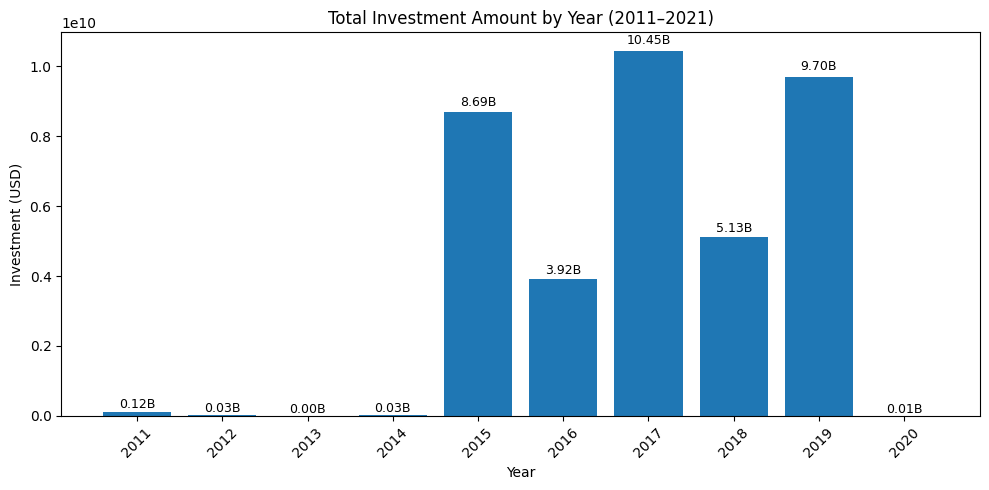

,year,final_amount
6,2017,1.044501e+10
8,2019,9.700883e+09
4,2015,8.693745e+09
7,2018,5.128831e+09
5,2016,3.922503e+09
0,2011,1.248110e+08
1,2012,2.800000e+07
3,2014,2.543190e+07
9,2020,5.300000e+06
2,2013,3.587000e+06


In [41]:
import matplotlib.pyplot as plt

yearly = df.groupby('year', as_index=False)['final_amount'].sum()

plt.figure(figsize=(10,5))
ax = plt.bar(yearly['year'], yearly['final_amount'])
plt.title("Total Investment Amount by Year (2011–2021)")
plt.ylabel("Investment (USD)")
plt.xlabel("Year")
plt.xticks(yearly['year'], rotation=45)
# annotate
for x, y in zip(yearly['year'], yearly['final_amount']):
    plt.text(x, y*1.01, f"{y/1e9:.2f}B", ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

yearly.sort_values('final_amount', ascending=False).head(10)


In [42]:
TOPN = 10

top_startups = (df.groupby('startup_name', as_index=False)['final_amount']
                  .sum().sort_values('final_amount', ascending=False).head(TOPN))
top_sectors  = (df.groupby('sector', as_index=False)['final_amount']
                  .sum().sort_values('final_amount', ascending=False).head(TOPN))
top_cities   = (df.groupby('city_clean', as_index=False)['final_amount']
                  .sum().sort_values('final_amount', ascending=False).head(TOPN))

# investors: split by comma and explode
inv = df[['investors_clean','final_amount']].dropna()
inv = (inv.assign(investor=inv['investors_clean'].str.split(','))
          .explode('investor'))
inv['investor'] = inv['investor'].str.strip().str.title()
top_investors = (inv.groupby('investor', as_index=False)['final_amount']
                   .sum().sort_values('final_amount', ascending=False).head(TOPN))

top_startups, top_sectors, top_cities, top_investors[:10]


(          startup_name  final_amount
 496           Flipkart  4.059700e+09
 1187  Rapido Bike Taxi  3.900000e+09
 1086             Paytm  3.148950e+09
 1043               Ola  9.845000e+08
 1504             Udaan  8.700000e+08
 497       Flipkart.Com  7.000000e+08
 1337          Snapdeal  7.000000e+08
 1044          Ola Cabs  6.697000e+08
 1072         Oyo Rooms  6.350000e+08
 1489        True North  6.000000e+08,
                                sector  final_amount
 142                         Ecommerce  7.164691e+09
 89                  Consumer Internet  6.317691e+09
 561                    Transportation  3.908584e+09
 557                        Technology  2.230041e+09
 182                           Finance  1.971438e+09
 189                           Fintech  1.256922e+09
 0                                      1.231611e+09
 137                        E-Commerce  1.067336e+09
 437                Online Marketplace  7.001430e+08
 138  E-Commerce & M-Commerce Platform  6.800000e+0

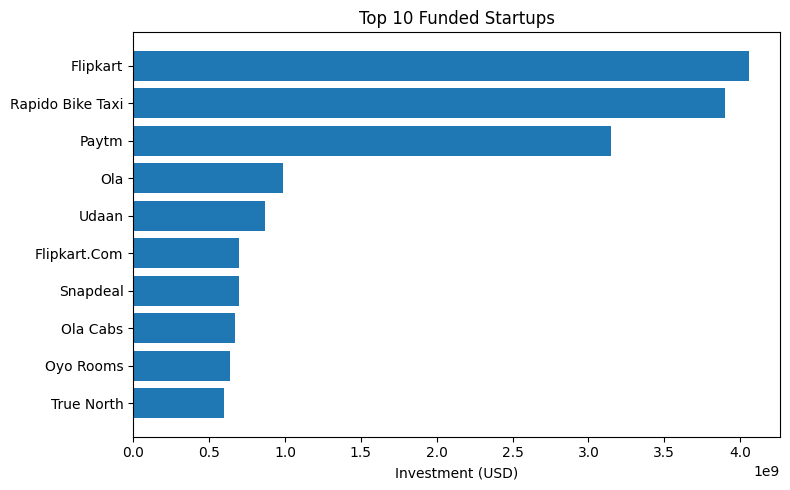

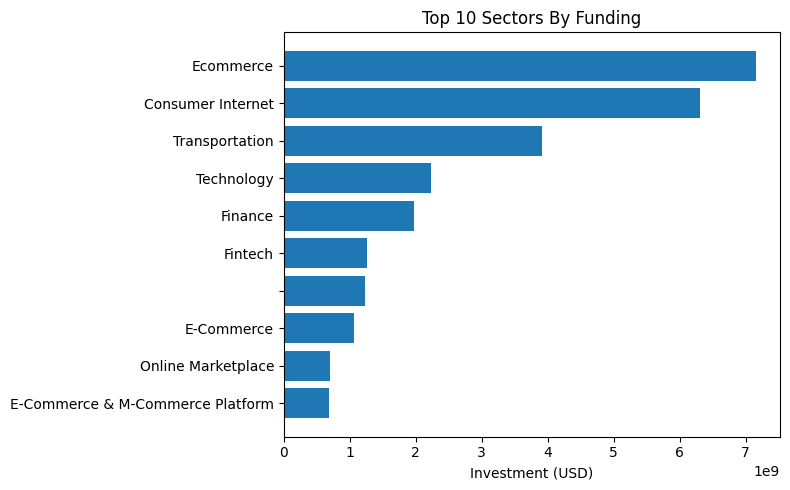

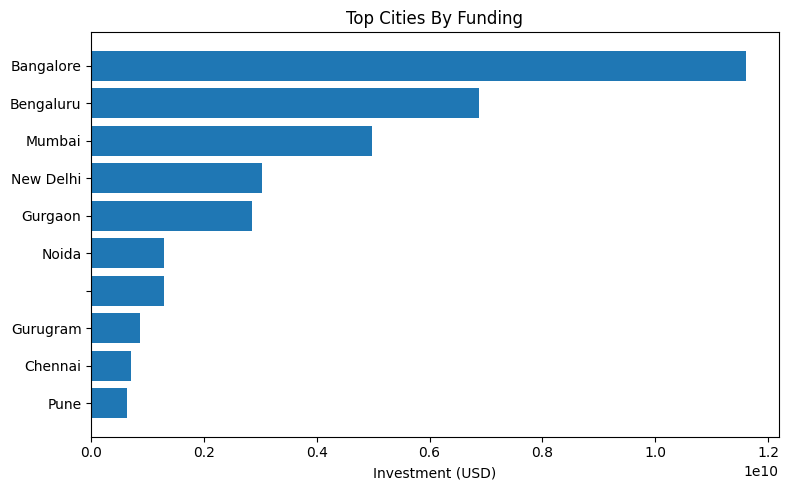

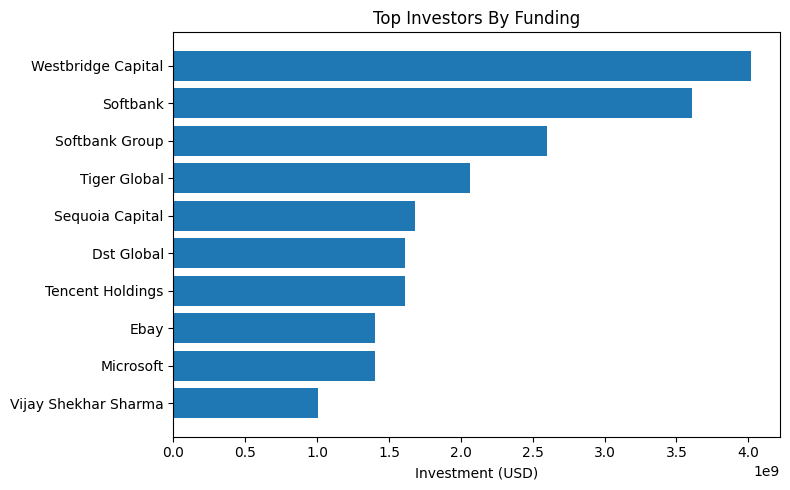

In [43]:
def barh(df_, x, y, title):
    plt.figure(figsize=(8,5))
    plt.barh(df_[x], df_[y])
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel('Investment (USD)')
    plt.tight_layout()
    plt.show()

barh(top_startups, 'startup_name', 'final_amount', 'Top 10 Funded Startups')
barh(top_sectors,  'sector',       'final_amount', 'Top 10 Sectors By Funding')
barh(top_cities,   'city_clean',   'final_amount', 'Top Cities By Funding')
barh(top_investors,'investor',     'final_amount', 'Top Investors By Funding')


In [44]:
by_year = (df.groupby('year')
             .agg(total_funding=('final_amount','sum'),
                  deals=('final_amount','size'),
                  avg_deal=('final_amount','mean'))
             .reset_index())
by_year


,year,total_funding,deals,avg_deal
0,2011,1.248110e+08,4,3.120275e+07
1,2012,2.800000e+07,1,2.800000e+07
2,2013,3.587000e+06,3,1.195667e+06
3,2014,2.543190e+07,7,3.633129e+06
4,2015,8.693745e+09,658,1.321238e+07
5,2016,3.922503e+09,610,6.430332e+06
6,2017,1.044501e+10,461,2.265730e+07
7,2018,5.128831e+09,271,1.892558e+07
8,2019,9.700883e+09,111,8.739534e+07
9,2020,5.300000e+06,2,2.650000e+06


In [45]:
# Funding concentration index (Herfindahl) by year across startups
def hhi(x):
    # shares over startups in that year
    shares = (x / x.sum())**2
    return shares.sum()

conc = (df.groupby(['year','startup_name'])['final_amount'].sum()
          .groupby('year').apply(hhi).reset_index(name='hhi_startup_concentration'))

# Volatility of monthly funding (how spiky a year was)
df['month'] = pd.to_datetime(df['date'], errors='coerce').dt.to_period('M')
vol = (df.dropna(subset=['month'])
         .groupby('month')['final_amount'].sum()
         .reset_index()
         .assign(year=lambda d: d['month'].dt.year)
         .groupby('year')['final_amount'].std()
         .reset_index(name='monthly_funding_volatility'))

risk_summary = by_year.merge(conc, on='year', how='left').merge(vol, on='year', how='left')
risk_summary.sort_values('year')


,year,total_funding,deals,avg_deal,hhi_startup_concentration,monthly_funding_volatility
0,2011,1.248110e+08,4,3.120275e+07,0.955765,NaN
1,2012,2.800000e+07,1,2.800000e+07,1.000000,NaN
2,2013,3.587000e+06,3,1.195667e+06,0.410115,NaN
3,2014,2.543190e+07,7,3.633129e+06,0.474567,NaN
4,2015,8.693745e+09,658,1.321238e+07,0.026865,4.692817e+08
5,2016,3.922503e+09,610,6.430332e+06,0.017522,1.526362e+08
6,2017,1.044501e+10,461,2.265730e+07,0.173779,8.806456e+08
7,2018,5.128831e+09,271,1.892558e+07,0.034371,3.395005e+08
8,2019,9.700883e+09,111,8.739534e+07,0.183551,1.324587e+09
9,2020,5.300000e+06,2,2.650000e+06,0.693841,NaN


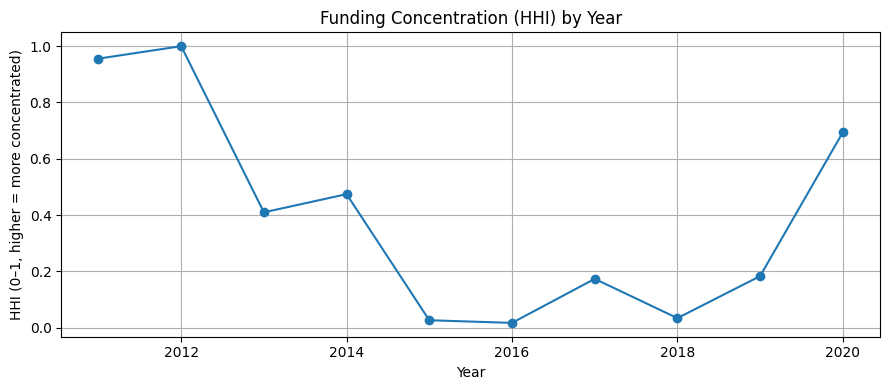

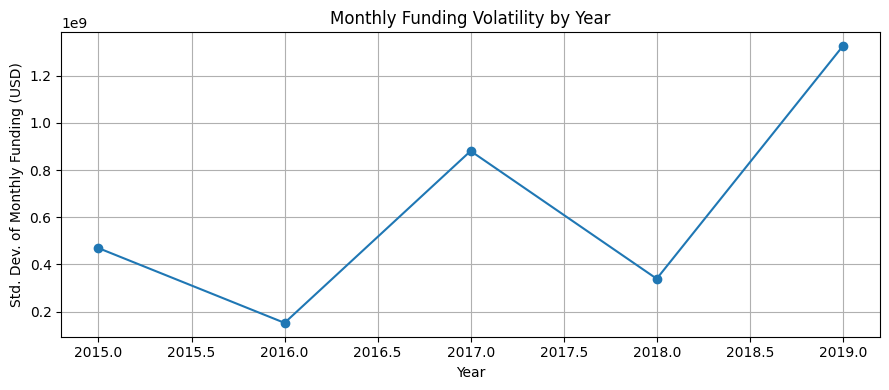

In [47]:
import matplotlib.pyplot as plt

rs = risk_summary.sort_values('year').copy()

fig, ax = plt.subplots(figsize=(9,4))
ax.plot(rs['year'], rs['hhi_startup_concentration'], marker='o')
ax.set_title('Funding Concentration (HHI) by Year')
ax.set_xlabel('Year'); ax.set_ylabel('HHI (0–1, higher = more concentrated)')
ax.grid(True); plt.tight_layout(); plt.show()

fig, ax = plt.subplots(figsize=(9,4))
ax.plot(rs['year'], rs['monthly_funding_volatility'], marker='o')
ax.set_title('Monthly Funding Volatility by Year')
ax.set_xlabel('Year'); ax.set_ylabel('Std. Dev. of Monthly Funding (USD)')
ax.grid(True); plt.tight_layout(); plt.show()


In [48]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

score_df = rs[['year','hhi_startup_concentration','monthly_funding_volatility']].copy()

# handle any NaNs
score_df[['hhi_startup_concentration','monthly_funding_volatility']] = \
    score_df[['hhi_startup_concentration','monthly_funding_volatility']].fillna(0)

scaler = MinMaxScaler()
score_df[['hhi_norm','vol_norm']] = scaler.fit_transform(
    score_df[['hhi_startup_concentration','monthly_funding_volatility']]
)

# weight HHI a bit more than volatility (e.g., 0.6/0.4). tweak if you want.
score_df['risk_score'] = 0.6*score_df['hhi_norm'] + 0.4*score_df['vol_norm']

score_df.sort_values('year')


,year,hhi_startup_concentration,monthly_funding_volatility,hhi_norm,vol_norm,risk_score
0,2011,0.955765,0.000000e+00,0.954976,0.000000,0.572986
1,2012,1.000000,0.000000e+00,1.000000,0.000000,0.600000
2,2013,0.410115,0.000000e+00,0.399595,0.000000,0.239757
3,2014,0.474567,0.000000e+00,0.465197,0.000000,0.279118
4,2015,0.026865,4.692817e+08,0.009511,0.354285,0.147420
5,2016,0.017522,1.526362e+08,0.000000,0.115233,0.046093
6,2017,0.173779,8.806456e+08,0.159045,0.664845,0.361365
7,2018,0.034371,3.395005e+08,0.017150,0.256307,0.112813
8,2019,0.183551,1.324587e+09,0.168990,1.000000,0.501394
9,2020,0.693841,0.000000e+00,0.688381,0.000000,0.413029


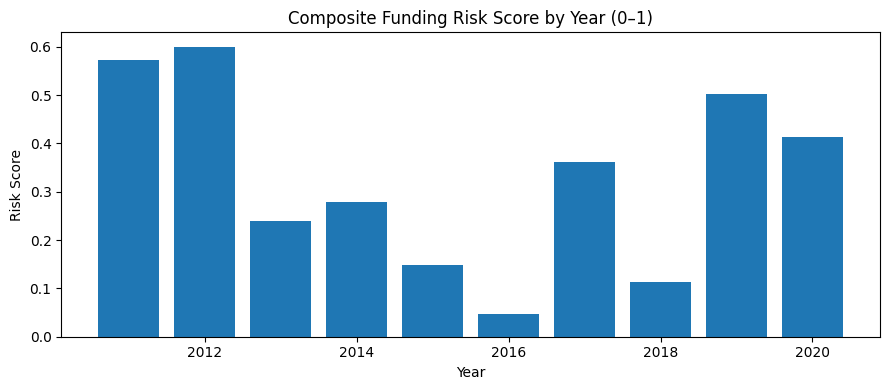

In [49]:
fig, ax = plt.subplots(figsize=(9,4))
ax.bar(score_df['year'], score_df['risk_score'])
ax.set_title('Composite Funding Risk Score by Year (0–1)')
ax.set_xlabel('Year'); ax.set_ylabel('Risk Score')
plt.tight_layout(); plt.show()


In [50]:
# merge back totals to have context
summary_for_story = (by_year[['year','total_funding','deals','avg_deal']]
                     .merge(score_df[['year','risk_score']], on='year', how='left')
                     .sort_values('year'))

peak_year = summary_for_story.sort_values('total_funding', ascending=False).iloc[0]
risky_year = summary_for_story.sort_values('risk_score', ascending=False).iloc[0]
stable_year = summary_for_story.sort_values('risk_score', ascending=True).iloc[0]

insights = {
    "Peak Funding Year": f"{int(peak_year.year)} — ${peak_year.total_funding:,.0f}",
    "Highest Risk Year": f"{int(risky_year.year)} — score {risky_year.risk_score:.2f}",
    "Most Stable Year": f"{int(stable_year.year)} — score {stable_year.risk_score:.2f}",
    "Avg Deal (Peak Year)": f"${peak_year.avg_deal:,.0f} across {int(peak_year.deals)} deals"
}
insights


{'Peak Funding Year': '2017 — $10,445,013,730',
 'Highest Risk Year': '2012 — score 0.60',
 'Most Stable Year': '2016 — score 0.05',
 'Avg Deal (Peak Year)': '$22,657,297 across 461 deals'}

In [51]:
story = (
    f"In {int(peak_year.year)}, total funding peaked at ${peak_year.total_funding:,.0f}. "
    f"Funding concentration and monthly volatility combine to give a composite risk score. "
    f"The year with the highest composite risk was {int(risky_year.year)} (score {risky_year.risk_score:.2f}), "
    f"while {int(stable_year.year)} appeared most stable (score {stable_year.risk_score:.2f}). "
    f"In the peak year, average deal size was ${peak_year.avg_deal:,.0f} across {int(peak_year.deals)} deals."
)
story


'In 2017, total funding peaked at $10,445,013,730. Funding concentration and monthly volatility combine to give a composite risk score. The year with the highest composite risk was 2012 (score 0.60), while 2016 appeared most stable (score 0.05). In the peak year, average deal size was $22,657,297 across 461 deals.'

In [52]:
risk_summary_out = summary_for_story.merge(
    rs[['year','hhi_startup_concentration','monthly_funding_volatility']], on='year', how='left'
).sort_values('year')

risk_csv = '/content/FundSight_risk_summary.csv'
risk_summary_out.to_csv(risk_csv, index=False)
risk_csv


'/content/FundSight_risk_summary.csv'

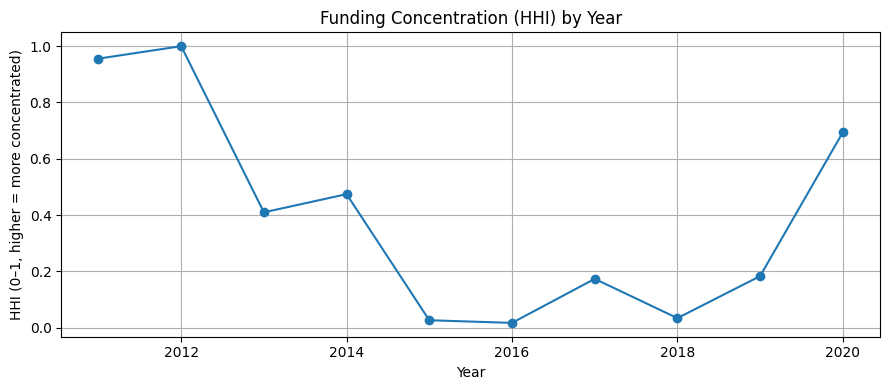

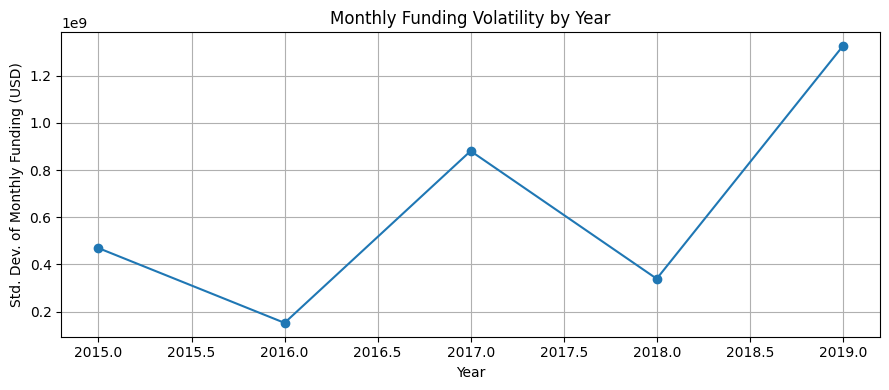

In [54]:
import matplotlib.pyplot as plt

rs = risk_summary.sort_values('year').copy()

fig, ax = plt.subplots(figsize=(9,4))
ax.plot(rs['year'], rs['hhi_startup_concentration'], marker='o')
ax.set_title('Funding Concentration (HHI) by Year')
ax.set_xlabel('Year'); ax.set_ylabel('HHI (0–1, higher = more concentrated)')
ax.grid(True); plt.tight_layout(); plt.show()

fig, ax = plt.subplots(figsize=(9,4))
ax.plot(rs['year'], rs['monthly_funding_volatility'], marker='o')
ax.set_title('Monthly Funding Volatility by Year')
ax.set_xlabel('Year'); ax.set_ylabel('Std. Dev. of Monthly Funding (USD)')
ax.grid(True); plt.tight_layout(); plt.show()


In [55]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

score_df = rs[['year','hhi_startup_concentration','monthly_funding_volatility']].copy()

# handle any NaNs
score_df[['hhi_startup_concentration','monthly_funding_volatility']] = \
    score_df[['hhi_startup_concentration','monthly_funding_volatility']].fillna(0)

scaler = MinMaxScaler()
score_df[['hhi_norm','vol_norm']] = scaler.fit_transform(
    score_df[['hhi_startup_concentration','monthly_funding_volatility']]
)

# weight HHI a bit more than volatility (e.g., 0.6/0.4). tweak if you want.
score_df['risk_score'] = 0.6*score_df['hhi_norm'] + 0.4*score_df['vol_norm']

score_df.sort_values('year')


,year,hhi_startup_concentration,monthly_funding_volatility,hhi_norm,vol_norm,risk_score
0,2011,0.955765,0.000000e+00,0.954976,0.000000,0.572986
1,2012,1.000000,0.000000e+00,1.000000,0.000000,0.600000
2,2013,0.410115,0.000000e+00,0.399595,0.000000,0.239757
3,2014,0.474567,0.000000e+00,0.465197,0.000000,0.279118
4,2015,0.026865,4.692817e+08,0.009511,0.354285,0.147420
5,2016,0.017522,1.526362e+08,0.000000,0.115233,0.046093
6,2017,0.173779,8.806456e+08,0.159045,0.664845,0.361365
7,2018,0.034371,3.395005e+08,0.017150,0.256307,0.112813
8,2019,0.183551,1.324587e+09,0.168990,1.000000,0.501394
9,2020,0.693841,0.000000e+00,0.688381,0.000000,0.413029


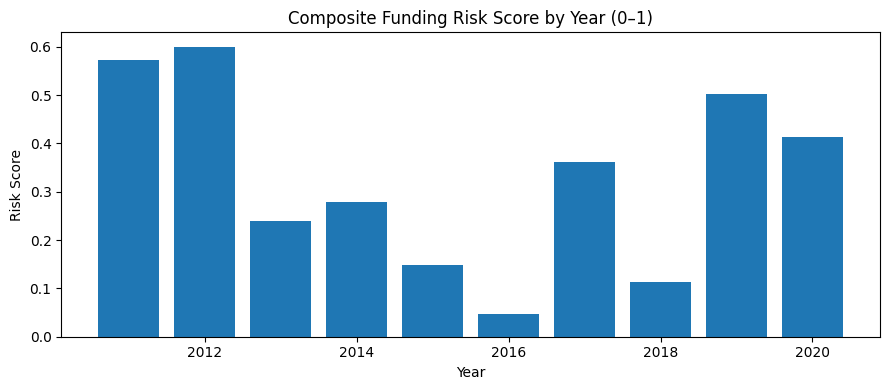

In [56]:
fig, ax = plt.subplots(figsize=(9,4))
ax.bar(score_df['year'], score_df['risk_score'])
ax.set_title('Composite Funding Risk Score by Year (0–1)')
ax.set_xlabel('Year'); ax.set_ylabel('Risk Score')
plt.tight_layout(); plt.show()


In [57]:
# merge back totals to have context
summary_for_story = (by_year[['year','total_funding','deals','avg_deal']]
                     .merge(score_df[['year','risk_score']], on='year', how='left')
                     .sort_values('year'))

peak_year = summary_for_story.sort_values('total_funding', ascending=False).iloc[0]
risky_year = summary_for_story.sort_values('risk_score', ascending=False).iloc[0]
stable_year = summary_for_story.sort_values('risk_score', ascending=True).iloc[0]

insights = {
    "Peak Funding Year": f"{int(peak_year.year)} — ${peak_year.total_funding:,.0f}",
    "Highest Risk Year": f"{int(risky_year.year)} — score {risky_year.risk_score:.2f}",
    "Most Stable Year": f"{int(stable_year.year)} — score {stable_year.risk_score:.2f}",
    "Avg Deal (Peak Year)": f"${peak_year.avg_deal:,.0f} across {int(peak_year.deals)} deals"
}
insights


{'Peak Funding Year': '2017 — $10,445,013,730',
 'Highest Risk Year': '2012 — score 0.60',
 'Most Stable Year': '2016 — score 0.05',
 'Avg Deal (Peak Year)': '$22,657,297 across 461 deals'}

In [58]:
story = (
    f"In {int(peak_year.year)}, total funding peaked at ${peak_year.total_funding:,.0f}. "
    f"Funding concentration and monthly volatility combine to give a composite risk score. "
    f"The year with the highest composite risk was {int(risky_year.year)} (score {risky_year.risk_score:.2f}), "
    f"while {int(stable_year.year)} appeared most stable (score {stable_year.risk_score:.2f}). "
    f"In the peak year, average deal size was ${peak_year.avg_deal:,.0f} across {int(peak_year.deals)} deals."
)
story


'In 2017, total funding peaked at $10,445,013,730. Funding concentration and monthly volatility combine to give a composite risk score. The year with the highest composite risk was 2012 (score 0.60), while 2016 appeared most stable (score 0.05). In the peak year, average deal size was $22,657,297 across 461 deals.'

In [59]:
risk_summary_out = summary_for_story.merge(
    rs[['year','hhi_startup_concentration','monthly_funding_volatility']], on='year', how='left'
).sort_values('year')

risk_csv = '/content/FundSight_risk_summary.csv'
risk_summary_out.to_csv(risk_csv, index=False)
risk_csv


'/content/FundSight_risk_summary.csv'

In [63]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# HHI Function
def hhi(x):
    return ((x / x.sum())**2).sum()

# Recompute on filtered data
tmp = df.copy()
tmp['month'] = pd.to_datetime(tmp['date'], errors='coerce').dt.to_period('M')

# Concentration (HHI)
conc = (tmp.groupby(['year','startup_name'])['final_amount'].sum()
          .groupby('year').apply(hhi).reset_index(name='HHI'))

# Volatility
vol = (tmp.dropna(subset=['month'])
         .groupby('month')['final_amount'].sum().reset_index()
         .assign(year=lambda d: d['month'].dt.year)
         .groupby('year')['final_amount'].std()
         .reset_index(name='Volatility'))

# Yearly summary
by_year_f = (tmp.groupby('year')
             .agg(Total=('final_amount','sum'),
                  Deals=('final_amount','size'),
                  AvgDeal=('final_amount','mean'))
             .reset_index())

# Merge
risk = by_year_f.merge(conc, on='year', how='left').merge(vol, on='year', how='left').fillna(0)

# Normalize with MinMaxScaler
scaler = MinMaxScaler()
risk[['HHI_n', 'Vol_n']] = scaler.fit_transform(risk[['HHI', 'Volatility']])
risk['RiskScore'] = 0.6*risk['HHI_n'] + 0.4*risk['Vol_n']

# Show results in notebook
display(risk.sort_values('year'))


,year,Total,Deals,AvgDeal,HHI,Volatility,HHI_n,Vol_n,RiskScore
0,2011,1.248110e+08,4,3.120275e+07,0.955765,0.000000e+00,0.954976,0.000000,0.572986
1,2012,2.800000e+07,1,2.800000e+07,1.000000,0.000000e+00,1.000000,0.000000,0.600000
2,2013,3.587000e+06,3,1.195667e+06,0.410115,0.000000e+00,0.399595,0.000000,0.239757
3,2014,2.543190e+07,7,3.633129e+06,0.474567,0.000000e+00,0.465197,0.000000,0.279118
4,2015,8.693745e+09,658,1.321238e+07,0.026865,4.692817e+08,0.009511,0.354285,0.147420
5,2016,3.922503e+09,610,6.430332e+06,0.017522,1.526362e+08,0.000000,0.115233,0.046093
6,2017,1.044501e+10,461,2.265730e+07,0.173779,8.806456e+08,0.159045,0.664845,0.361365
7,2018,5.128831e+09,271,1.892558e+07,0.034371,3.395005e+08,0.017150,0.256307,0.112813
8,2019,9.700883e+09,111,8.739534e+07,0.183551,1.324587e+09,0.168990,1.000000,0.501394
9,2020,5.300000e+06,2,2.650000e+06,0.693841,0.000000e+00,0.688381,0.000000,0.413029


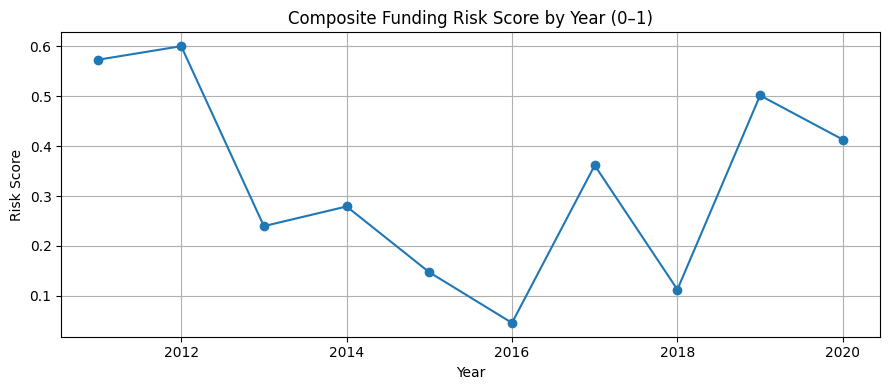

,year,Total,Deals,AvgDeal,HHI,Volatility,HHI_n,Vol_n,RiskScore
0,2011,1.248110e+08,4,3.120275e+07,0.955765,0.000000e+00,0.954976,0.000000,0.572986
1,2012,2.800000e+07,1,2.800000e+07,1.000000,0.000000e+00,1.000000,0.000000,0.600000
2,2013,3.587000e+06,3,1.195667e+06,0.410115,0.000000e+00,0.399595,0.000000,0.239757
3,2014,2.543190e+07,7,3.633129e+06,0.474567,0.000000e+00,0.465197,0.000000,0.279118
4,2015,8.693745e+09,658,1.321238e+07,0.026865,4.692817e+08,0.009511,0.354285,0.147420
5,2016,3.922503e+09,610,6.430332e+06,0.017522,1.526362e+08,0.000000,0.115233,0.046093
6,2017,1.044501e+10,461,2.265730e+07,0.173779,8.806456e+08,0.159045,0.664845,0.361365
7,2018,5.128831e+09,271,1.892558e+07,0.034371,3.395005e+08,0.017150,0.256307,0.112813
8,2019,9.700883e+09,111,8.739534e+07,0.183551,1.324587e+09,0.168990,1.000000,0.501394
9,2020,5.300000e+06,2,2.650000e+06,0.693841,0.000000e+00,0.688381,0.000000,0.413029


In [64]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# --- Recompute risk on your cleaned DF ---
tmp = df.copy()
tmp['date']  = pd.to_datetime(tmp['date'], errors='coerce')
tmp['month'] = tmp['date'].dt.to_period('M')

def hhi(x):
    s = (x/x.sum())**2
    return s.sum()

# HHI by year
conc = (tmp.groupby(['year','startup_name'])['final_amount'].sum()
          .groupby('year').apply(hhi).reset_index(name='HHI'))

# Monthly volatility by year
vol = (tmp.dropna(subset=['month'])
         .groupby('month')['final_amount'].sum().reset_index()
         .assign(year=lambda d: d['month'].dt.year)
         .groupby('year')['final_amount'].std()
         .reset_index(name='Volatility'))

by_year_f = (tmp.groupby('year')
               .agg(Total=('final_amount','sum'),
                    Deals=('final_amount','size'),
                    AvgDeal=('final_amount','mean'))
               .reset_index())

risk = by_year_f.merge(conc, on='year', how='left').merge(vol, on='year', how='left').fillna(0)

# Composite risk (0–1)
scaler = MinMaxScaler()
risk[['HHI_n','Vol_n']] = scaler.fit_transform(risk[['HHI','Volatility']])
risk['RiskScore'] = 0.6*risk['HHI_n'] + 0.4*risk['Vol_n']

# ---- Chart
risk_sorted = risk.sort_values('year')
plt.figure(figsize=(9,4))
plt.plot(risk_sorted['year'], risk_sorted['RiskScore'], marker='o')
plt.title('Composite Funding Risk Score by Year (0–1)')
plt.xlabel('Year'); plt.ylabel('Risk Score'); plt.grid(True); plt.tight_layout()
plt.show()

risk_sorted


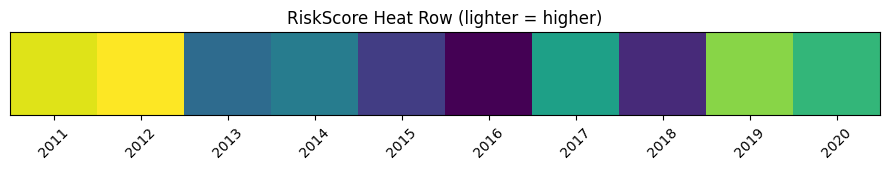

In [65]:
import numpy as np

years = risk_sorted['year'].to_numpy()
scores = risk_sorted['RiskScore'].to_numpy()[None, :]  # 1 x N heat row

plt.figure(figsize=(9,1.8))
plt.imshow(scores, aspect='auto')
plt.yticks([]); plt.xticks(ticks=np.arange(len(years)), labels=years, rotation=45)
plt.title('RiskScore Heat Row (lighter = higher)'); plt.tight_layout(); plt.show()


In [66]:
# 1) Clean dataset you built earlier
df[['startup_name','final_amount','year','date','city_clean','sector',
    'investors_clean','stage','type','source_file','source_year']].to_csv('/content/FundSight_clean.csv', index=False)

# 2) Risk summary table
risk_out = risk_sorted.merge(
    conc[['year','HHI']], on='year', how='left'
).merge(
    vol[['year','Volatility']], on='year', how='left'
)
risk_out.to_csv('/content/FundSight_risk_summary.csv', index=False)

# 3) (optional) smaller sample for faster deploys (last 4 years)
df_sample = df[df['year']>=2018].copy()
df_sample.to_csv('/content/FundSight_clean_sample.csv', index=False)

# Download to your laptop
from google.colab import files
files.download('/content/FundSight_clean.csv')
files.download('/content/FundSight_risk_summary.csv')
files.download('/content/FundSight_clean_sample.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>